Dataset Information

We will be investigating the following dataset: https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024?resource=download

This data set includes the most streamed spotify songs of 2024, up to 14/06/2024.

From this data, we want to investigate the following questions:

1) Which artist has been the most popular so far in 2024?
2) Which albums have been the most popular so far in 2024?
3) What is the relationship between Spotify Playlist Count and Spotify Playlist Reach?
4) How does a song being "Explicit" affect streams?

These questions will provide us with insights in to the most popular artists of 2024, and can be explored using data analysis and visualisation techniques. Python packages such as pandas, matplotlib, and seaborn can be used for data analysis and visualization.

In [3]:
#To begin we import pandas
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
#The above line formats all floats to 2 decimal places

In [4]:
#Load the data set
data = pd.read_csv('Most Streamed Spotify Songs 2024.csv')

In [5]:
#Examine the top few entries in order to gain a intuitive feel of the data
data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.40,"390,470,936","30,716","196,631,588",...,684,62.00,"17,598,718",114.00,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.90,"323,703,884","28,113","174,597,137",...,3,67.00,"10,422,430",111.00,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.40,"601,309,283","54,331","211,607,669",...,536,136.00,"36,321,847",172.00,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.90,"2,031,280,633","269,802","136,569,078",...,"2,182",264.00,"24,684,248",210.00,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.30,"107,034,922","7,223","151,469,874",...,1,82.00,"17,660,624",105.00,"4,493,884","7,006","207,179","457,017",NaN,1


In [6]:
#Next we investigate the basic properties of the data set columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

From the above information, we can see that columns numbered 11 to 27, do not contain data relating to spotify. As we are not currently looking to perform a comparison between streaming platforms, we can safely discard these columns.

In [8]:
data_edit = data.drop(data.columns[11:28], axis = 1)
data_edit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Track                   4600 non-null   object 
 1   Album Name              4600 non-null   object 
 2   Artist                  4595 non-null   object 
 3   Release Date            4600 non-null   object 
 4   ISRC                    4600 non-null   object 
 5   All Time Rank           4600 non-null   object 
 6   Track Score             4600 non-null   float64
 7   Spotify Streams         4487 non-null   object 
 8   Spotify Playlist Count  4530 non-null   object 
 9   Spotify Playlist Reach  4528 non-null   object 
 10  Spotify Popularity      3796 non-null   float64
 11  Explicit Track          4600 non-null   int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 431.4+ KB


Now that we have removed non useful data, we can begin data cleansing and preprocessing.

Check for missing values and handle them appropriately.
Check for any duplicate entries and remove them if necessary.
Convert data types if needed (e.g., converting latitude and longitude to numeric types).

In [10]:
missing_values = data_edit.isnull().sum()
display("Missing Values:")
display(missing_values)

'Missing Values:'

Track                       0
Album Name                  0
Artist                      5
Release Date                0
ISRC                        0
All Time Rank               0
Track Score                 0
Spotify Streams           113
Spotify Playlist Count     70
Spotify Playlist Reach     72
Spotify Popularity        804
Explicit Track              0
dtype: int64

From the above, we can see that we are missing the data for 5 artists, and 113 streams. Given that these 2 columns are paramount to our analysis, we shall simply remove these entries from our data set.

In [12]:
df = data_edit.dropna(axis = 0)
df.isnull().sum()

Track                     0
Album Name                0
Artist                    0
Release Date              0
ISRC                      0
All Time Rank             0
Track Score               0
Spotify Streams           0
Spotify Playlist Count    0
Spotify Playlist Reach    0
Spotify Popularity        0
Explicit Track            0
dtype: int64

Now we have no missing records we can continue.

The next step, is converting the required columns in to a proper format.

In [14]:
df = df.replace(',','',regex = True)
#This removes all commas from the data frame as they interfere with changing data type

In [15]:
dtype_dict = {
    'All Time Rank': int,
    'Track Score': float, 
    'Spotify Streams': int, 
    'Spotify Playlist Count': int, 
    'Spotify Playlist Reach': int, 
    'Spotify Popularity': float 
}

df = df.astype(dtype_dict)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3780 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Track                   3780 non-null   object 
 1   Album Name              3780 non-null   object 
 2   Artist                  3780 non-null   object 
 3   Release Date            3780 non-null   object 
 4   ISRC                    3780 non-null   object 
 5   All Time Rank           3780 non-null   int64  
 6   Track Score             3780 non-null   float64
 7   Spotify Streams         3780 non-null   int64  
 8   Spotify Playlist Count  3780 non-null   int64  
 9   Spotify Playlist Reach  3780 non-null   int64  
 10  Spotify Popularity      3780 non-null   float64
 11  Explicit Track          3780 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 383.9+ KB


Let's now look at some basic summary statistics:

In [17]:
numerical_columns_summary = df[['Spotify Streams','Spotify Playlist Count']].describe()

numerical_columns_summary

,Spotify Streams,Spotify Playlist Count
count,3780.00,3780.00
mean,493460630.66,69821.30
std,539803411.07,73385.89
min,2030.00,1.00
25%,110542705.25,14426.50
50%,305334820.00,46721.00
75%,689957302.75,100058.25
max,4281468720.00,590392.00


Moving on, let's now continue with the first topic of our investigation in to this dataset, "Which artist has been the most popular so far in 2024?"

In [19]:
total_streams_per_artist = df.groupby('Artist')['Spotify Streams'].sum().reset_index()
total_streams_per_artist_sorted = total_streams_per_artist.sort_values(by='Spotify Streams', ascending=False)
top_ten_artists = total_streams_per_artist_sorted.head(10)

top_ten_artists_reset = top_ten_artists.reset_index(drop=True)
top_ten_artists_reset.index = top_ten_artists_reset.index + 1

top_ten_artists_reset

#This cell sums the total streams per artists and outputs the top 10

,Artist,Spotify Streams
1,The Weeknd,36136994697
2,Bad Bunny,34938514865
3,Drake,31898454929
4,Taylor Swift,30215736039
5,Post Malone,25887392545
6,Ed Sheeran,24014900390
7,Ariana Grande,22390850555
8,Olivia Rodrigo,18023458668
9,Imagine Dragons,17105896795
10,XXXTENTACION,16919208255


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

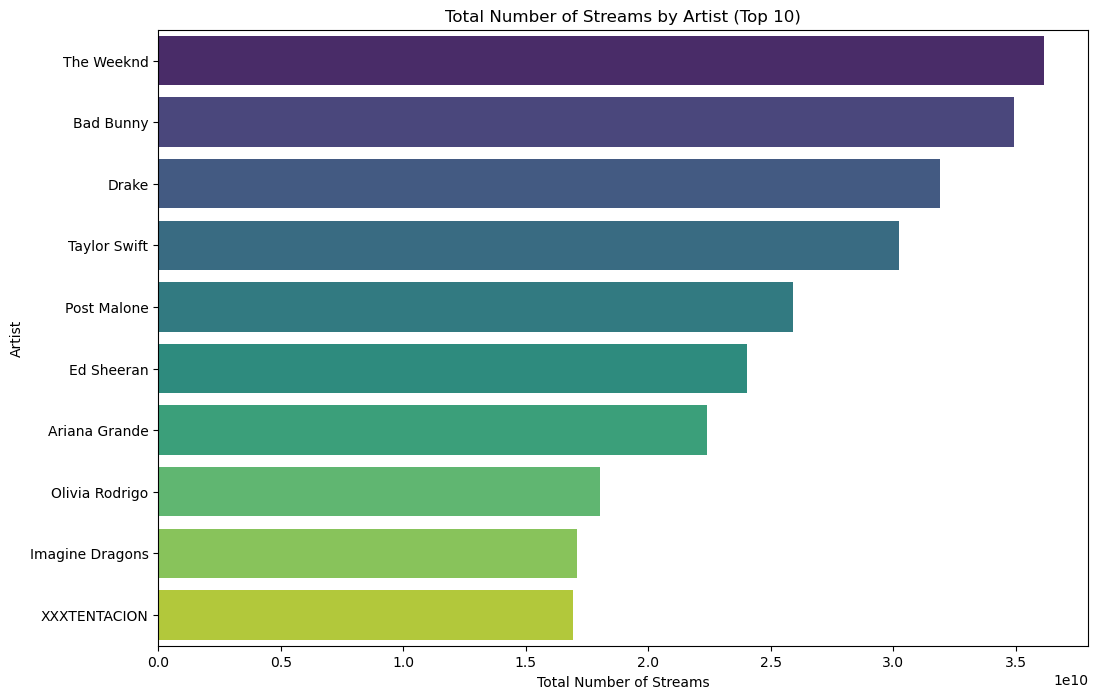

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_ten_artists_reset['Spotify Streams'], y=top_ten_artists_reset['Artist'], palette="viridis")
plt.title('Total Number of Streams by Artist (Top 10)')
plt.xlabel('Total Number of Streams')
plt.ylabel('Artist')
plt.show()

From the above, we can see a clear representation of the top 10 most popular artists. Of note, is that there is visible "drops" in stream numbers as we go down the list, specifically after Bad Bunny, Taylor Swift and Ariana Grande. Further study could be performed to investigate if there is an underlying reason for said drops.

Nevertheless, We can see that the most popular artist so far this year, has been "The Weeknd".

Moving on to our 2nd point of investigation: "Which albums have been the most popular so far in 2024?" 

In [24]:
# Group by 'Album Name', sum the streams and take the first artist for each album
total_streams_per_album = df.groupby('Album Name').agg({'Artist': 'first', 'Spotify Streams': 'sum'}).reset_index()

# Sort the albums by 'Spotify Streams' in descending order
total_streams_per_album_sorted = total_streams_per_album.sort_values(by='Spotify Streams', ascending=False)

# Get the top 10 albums
top_ten_albums = total_streams_per_album_sorted.head(10)

# Reset index for the top 10 albums and adjust the index to start from 1
top_ten_albums_reset = top_ten_albums.reset_index(drop=True)
top_ten_albums_reset.index = top_ten_albums_reset.index + 1

top_ten_albums_reset

,Album Name,Artist,Spotify Streams
1,Full Circle: The Live Anthology,Mark Ronson,19204411183
2,Un Verano Sin Ti,Bad Bunny,14693623744
3,EPIC AF,French Montana,6723669249
4,Dua Lipa (Complete Edition),Calvin Harris,6694592457
5,Starboy,The Weeknd,6572780303
6,Todo Exitos 2014 (Los Nï¿½ï¿½mero 1 Del A,Sia,6239553106
7,1989 (Deluxe),Taylor Swift,6022767764
8,ýý (Deluxe),Ed Sheeran,5604016733
9,YHLQMDLG,Bad Bunny,5406717465
10,SOUR,Olivia Rodrigo,5281422618


Before visualising this data, I'll briefly comment in some errors in data cleansing. Take for instance entry number 8. Unfortunately for ourselves Mr Sheeran likes to use symbols as his album titles, which will not play well depending on the typesetting and interpretation. Thankfully, due to the nature of this analysis, we can safely assume this album to be his 2023 release "-".

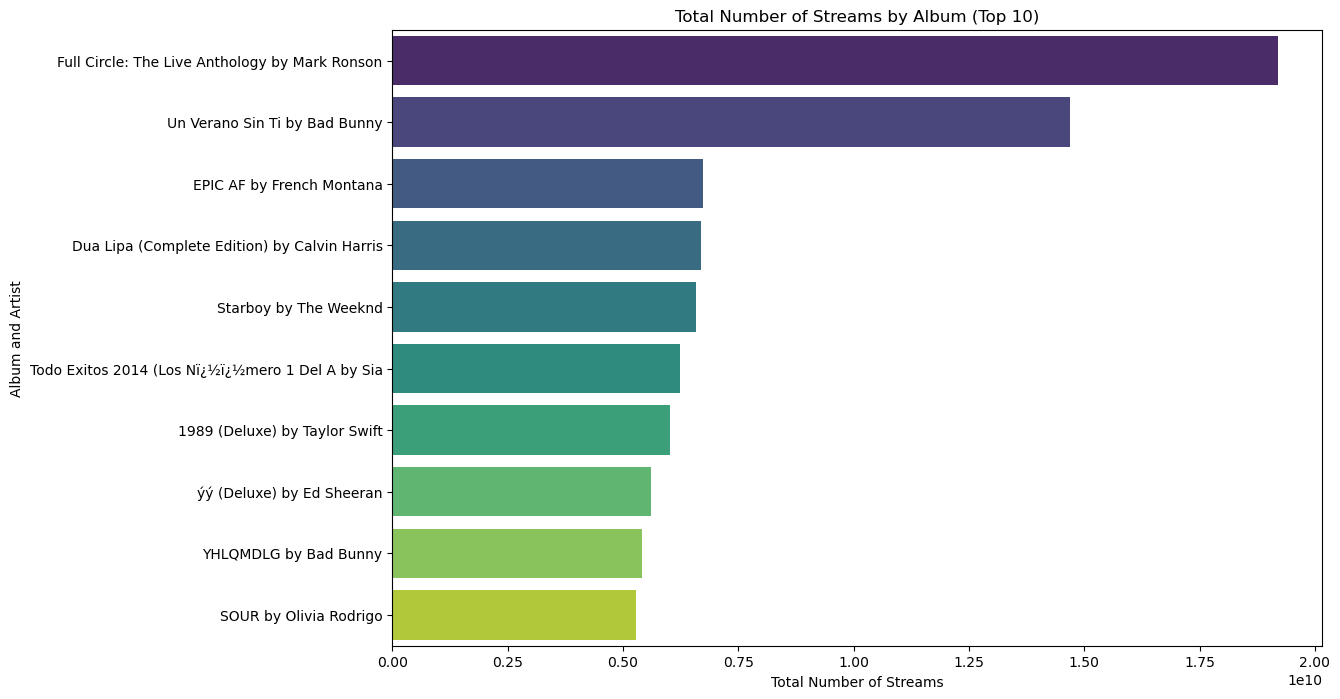

In [26]:
top_ten_albums_reset['Album and Artist'] = top_ten_albums_reset['Album Name'] + ' by ' + top_ten_albums_reset['Artist']

# Plot the barplot using the new 'Album and Artist' column
plt.figure(figsize=(12, 8))
sns.barplot(x=top_ten_albums_reset['Spotify Streams'], y=top_ten_albums_reset['Album and Artist'], palette="viridis")

# Set titles and labels
plt.title('Total Number of Streams by Album (Top 10)')
plt.xlabel('Total Number of Streams')
plt.ylabel('Album and Artist')

# Show plot
plt.show()

We can see quite clearly see then that there are two standout albums so far this year, those being "Full Circle: The Live Anthology" by Mark Ronson and "Un Verano Sin Ti" by Bad Bunny. 

Interestingly, while The Weeknd does appear in our top 10 albums, we would expect him to be much higher, owing to him being number one on our most streamed artists. This leads ourselves to postulate that perhaps the streams of The Weeknd's songs are more spread out across his back catalogue.

Let's now move on to our third question, "What is the relationship between Spotify Playlist Count and Spotify Playlist Reach?"

Whilst previous categories were quite straightforward to understand (i.e. 'Artist', 'Album Name') 'Spotify Playlist Count' and 'Spotify Playlist Reach' both deserve some explanation. The definitions are as follows:

Spotify playlist reach is the total number of followers across all playlists that feature an artist's song.

Spotify playlist count is the total number of playlists the artists song is in.

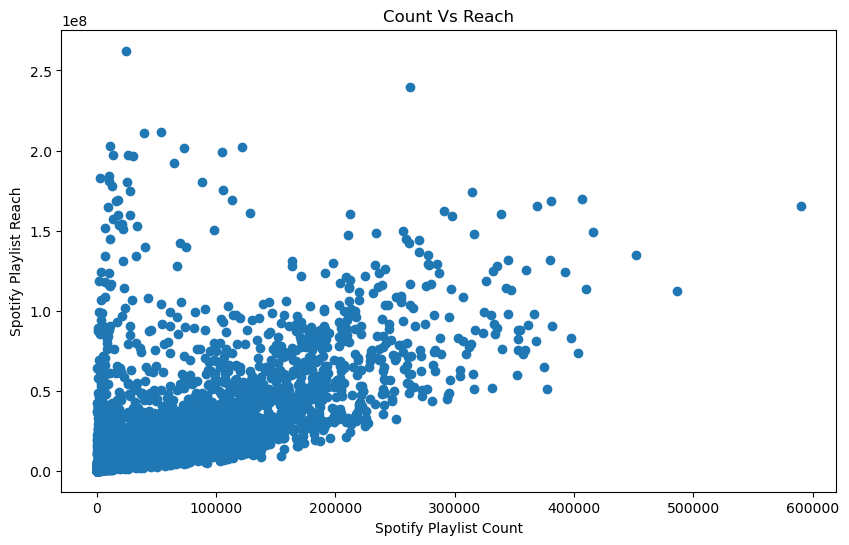

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Spotify Playlist Count'], df['Spotify Playlist Reach'])

# Adding labels and title
plt.title('Count Vs Reach')
plt.xlabel('Spotify Playlist Count')
plt.ylabel('Spotify Playlist Reach')

# Display the graph
plt.show()

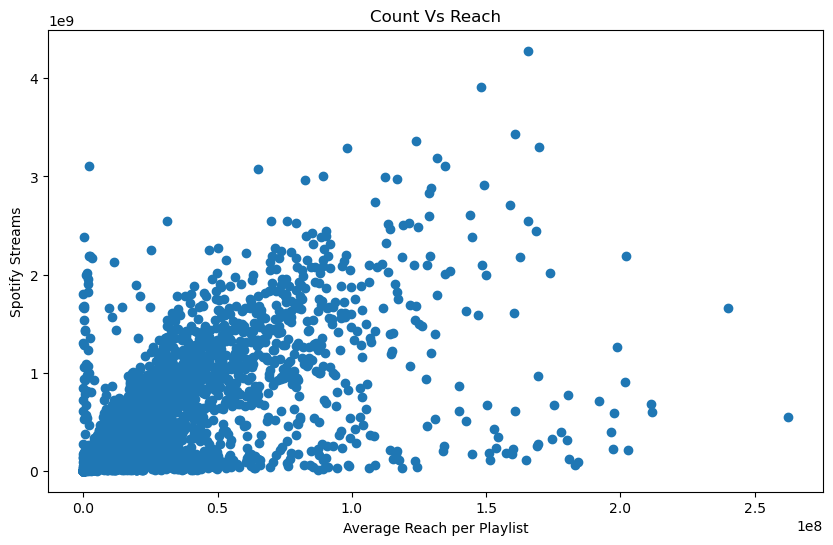

In [30]:
df['Average Reach per Playlist'] = df['Spotify Playlist Reach'] / df['Spotify Playlist Count']

plt.figure(figsize=(10, 6))
plt.scatter(df['Spotify Playlist Reach'], df['Spotify Streams'])

# Adding labels and title
plt.title('Count Vs Reach')
plt.xlabel('Average Reach per Playlist')
plt.ylabel('Spotify Streams')

# Display the graph
plt.show()

It appears as though we can't find a satisfactory relationship between Count and Reach.

Lets move on to question 4, "How does a song being "Explicit" affect Streams?"

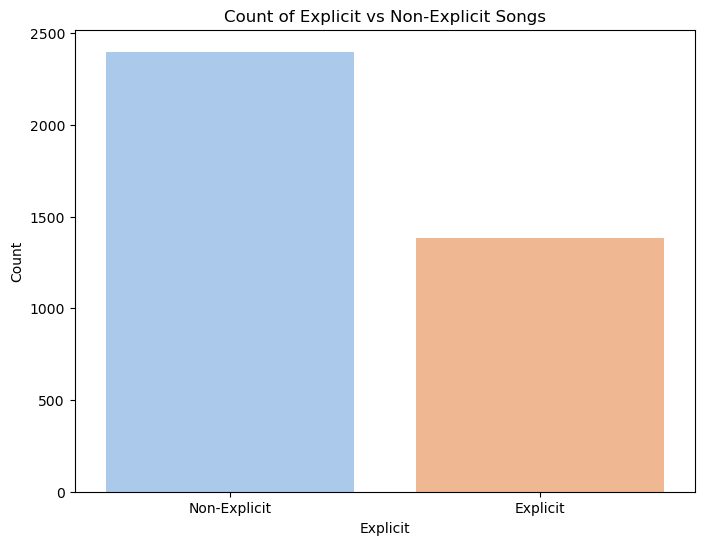

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of explicit vs non-explicit songs
plt.figure(figsize=(8, 6))
sns.countplot(x='Explicit Track', data=df, palette='pastel')
plt.title('Count of Explicit vs Non-Explicit Songs')
plt.xlabel('Explicit')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])  # Adjust labels for clarity
plt.show()

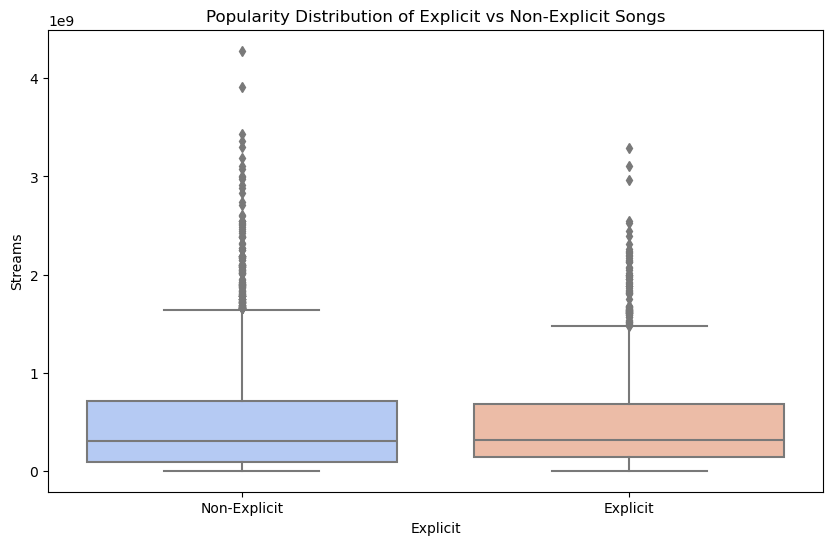

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Explicit Track', y='Spotify Streams', data=df, palette='coolwarm')
plt.title('Popularity Distribution of Explicit vs Non-Explicit Songs')
plt.xlabel('Explicit')
plt.ylabel('Streams')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.show()

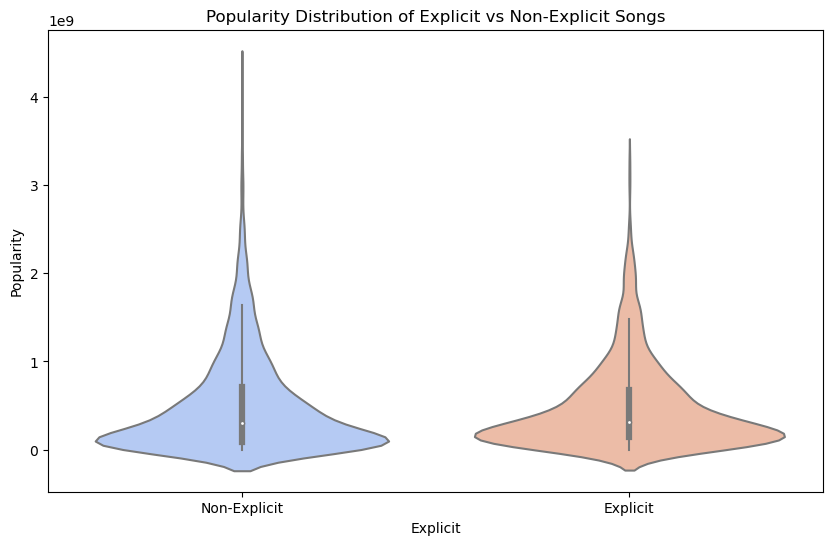

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Explicit Track', y='Spotify Streams', data=df, palette='coolwarm', split=True)
plt.title('Popularity Distribution of Explicit vs Non-Explicit Songs')
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


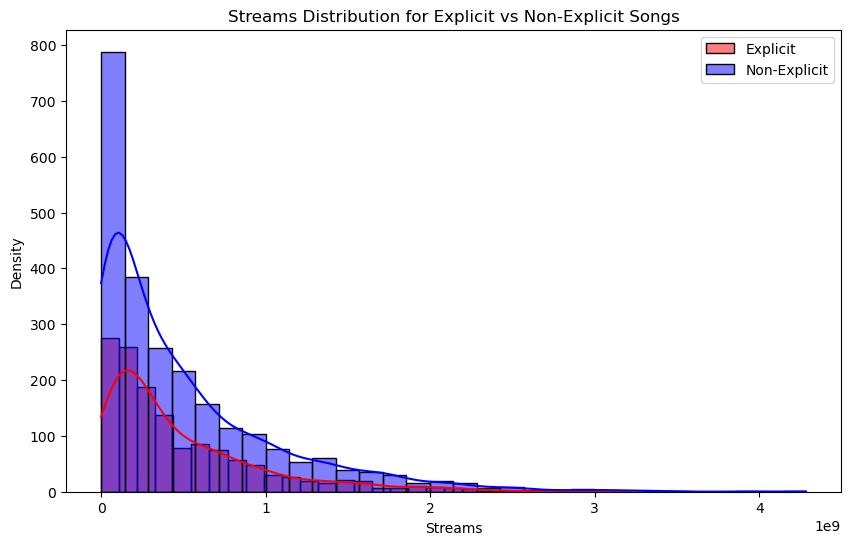

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Explicit Track'] == 1]['Spotify Streams'], color='red', label='Explicit', kde=True, bins=30)
sns.histplot(data=df[df['Explicit Track'] == 0]['Spotify Streams'], color='blue', label='Non-Explicit', kde=True, bins=30)
plt.title('Streams Distribution for Explicit vs Non-Explicit Songs')
plt.xlabel('Streams')
plt.ylabel('Density')
plt.legend()
plt.show()

What we can draw from the data is that the Explicit and Non-Explicit songs seem to be distributed approximately the same, however to reach the widest audience and maximise streams, the outliers are in stream numbers fall under the non-explicit category.